In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/classification_data.csv")
df

,X1,X2,y
0,-2.056844,-0.752741,0
1,1.760238,1.558517,1
2,-0.447763,-1.554927,1
3,1.008459,0.529517,1
4,0.636547,0.409058,1
...,...,...,...
95,-0.129932,-0.797169,0
96,1.426902,1.244639,1
97,-0.582968,1.630750,1
98,-0.619720,1.630840,0


## 로지스틱 회귀

In [3]:
import matplotlib.pyplot as plt

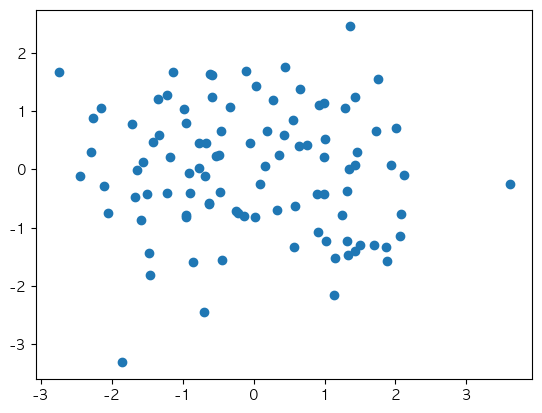

In [5]:
# 산점도 그리기(scatter plot)
plt.scatter(df['X1'],df['X2'])

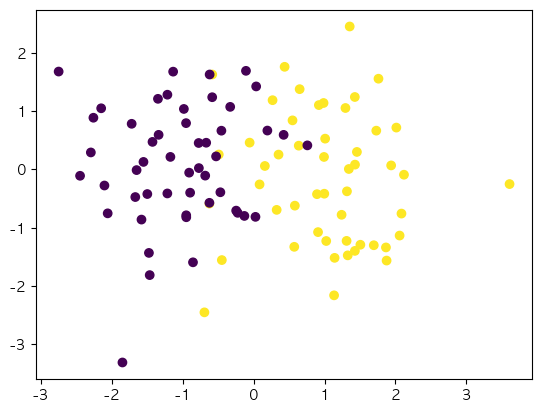

In [7]:
#scatter 패러미터 c: 각 observation의 색깔 지정
plt.scatter(df['X1'],df['X2'],c=df['y'])

## 로지스틱 함수

In [8]:
import numpy as np

In [11]:
z = np.linspace(-10,10,100)

In [13]:
## 로지스틱 함수 정의
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

In [18]:
## 함수 작동 확인
## numpy array의 broadcasting
sigmoid(z)

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

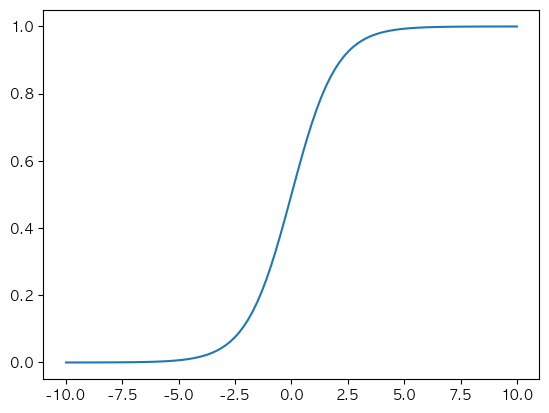

In [31]:
plt.plot(z,sigmoid(z))

## 로지스틱회귀 학습

In [32]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()

## 데이터 분할(독립, 종속)

In [35]:
X = df[['X1','X2']]
y = df['y']

In [37]:
reg.fit(X,y)

LogisticRegression()

## 학습결과 확인(패러미터)

In [41]:
W = reg.coef_
W

array([[ 2.43054461, -0.36712609]])

In [42]:
b = reg.intercept_
b

array([0.10689852])

## 학습된 패러미터로 계산한 확률 = sklearn 에서 계산한 확률

In [50]:
# 학습된 모델에 사용된 데이터 각각을 넣어서, 각각이 0 또는 1로 분류될 확률을 계산
reg.predict_proba(X)[:,1] # 학습에 사용된 데이터 각각이 1로 분류될 확률

array([9.79536428e-03, 9.78396557e-01, 3.98779096e-01, 9.14009457e-01,
       8.18152067e-01, 9.76852847e-01, 9.19846332e-01, 9.94713613e-01,
       2.24686977e-02, 6.15207317e-01, 5.80304202e-02, 9.24012699e-01,
       3.49644700e-02, 3.36785099e-01, 1.28652535e-01, 9.95725578e-01,
       4.42461057e-01, 9.94131604e-01, 8.89408990e-01, 6.15477130e-01,
       8.57800212e-01, 6.31427205e-02, 3.30997536e-03, 9.71687526e-01,
       4.18533625e-01, 4.50699667e-01, 7.64652303e-01, 3.67426783e-02,
       8.51702521e-01, 5.60984835e-02, 9.74845753e-01, 3.15143549e-01,
       9.83538602e-01, 9.67929571e-01, 2.24298915e-01, 9.91006356e-01,
       5.79244426e-01, 9.35934283e-01, 2.91520200e-01, 7.04274034e-01,
       9.83135422e-01, 1.27702994e-01, 9.99872585e-01, 2.32780030e-01,
       2.84490994e-02, 1.10969732e-01, 9.68908637e-01, 4.58623594e-01,
       1.45927355e-01, 2.32036460e-01, 7.55926094e-01, 9.54594429e-01,
       7.14597968e-01, 1.26339007e-02, 1.30213800e-01, 8.74020023e-01,
      

In [62]:
# sigmoid(W * X + b)
W.T.shape

(2, 1)

In [72]:
sigmoid(np.dot(X,W.T) + b) # 선형회귀로 예측되는 값

array([[9.79536428e-03],
       [9.78396557e-01],
       [3.98779096e-01],
       [9.14009457e-01],
       [8.18152067e-01],
       [9.76852847e-01],
       [9.19846332e-01],
       [9.94713613e-01],
       [2.24686977e-02],
       [6.15207317e-01],
       [5.80304202e-02],
       [9.24012699e-01],
       [3.49644700e-02],
       [3.36785099e-01],
       [1.28652535e-01],
       [9.95725578e-01],
       [4.42461057e-01],
       [9.94131604e-01],
       [8.89408990e-01],
       [6.15477130e-01],
       [8.57800212e-01],
       [6.31427205e-02],
       [3.30997536e-03],
       [9.71687526e-01],
       [4.18533625e-01],
       [4.50699667e-01],
       [7.64652303e-01],
       [3.67426783e-02],
       [8.51702521e-01],
       [5.60984835e-02],
       [9.74845753e-01],
       [3.15143549e-01],
       [9.83538602e-01],
       [9.67929571e-01],
       [2.24298915e-01],
       [9.91006356e-01],
       [5.79244426e-01],
       [9.35934283e-01],
       [2.91520200e-01],
       [7.04274034e-01],


## 정확도 계산

In [74]:
y_pred = reg.predict(X)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [78]:
y

0     0
1     1
2     1
3     1
4     1
     ..
95    0
96    1
97    1
98    0
99    1
Name: y, Length: 100, dtype: int64

In [83]:
y == y_pred

0      True
1      True
2     False
3      True
4      True
      ...  
95    False
96     True
97    False
98     True
99     True
Name: y, Length: 100, dtype: bool

In [88]:
#numpy array의 boradcasting
np.sum(y == y_pred)/ y.count() # True는 1, False 0으로 간주

0.89

In [90]:
W.shape

(1, 2)

In [92]:
X.shape

(100, 2)

(1,2)의 1이랑 (100,2)의 2가 맞아야 한다.

In [94]:
W.T.shape

(2, 1)

In [96]:
# X * W.T (100,2) * (2,1) = (100,1)
np.dot(X,W.T)

array([[-4.7229009 ],
       [ 3.70616385],
       [-0.51745333],
       [ 2.25670508],
       [ 1.3969789 ],
       [ 3.63556571],
       [ 2.33336247],
       [ 5.13042135],
       [-3.87980571],
       [ 0.36235609],
       [-2.89390414],
       [ 2.39126106],
       [-3.42473104],
       [-0.78455256],
       [-2.0198241 ],
       [ 5.3439243 ],
       [-0.33807842],
       [ 5.02538965],
       [ 1.97781987],
       [ 0.363496  ],
       [ 1.69023967],
       [-2.80403191],
       [-5.81439759],
       [ 3.42883326],
       [-0.43569443],
       [-0.30474267],
       [ 1.07145872],
       [-3.37328013],
       [ 1.64111854],
       [-2.92981157],
       [ 3.55035399],
       [-0.88307953],
       [ 3.98324027],
       [ 3.30032642],
       [-1.34768616],
       [ 4.59530437],
       [ 0.21277394],
       [ 2.57473735],
       [-0.99491077],
       [ 0.76083578],
       [ 3.95863292],
       [-2.02832128],
       [ 8.86103904],
       [-1.29957814],
       [-3.63767567],
       [-2

## 의사결정의 경계선

In [98]:
# w1 * X1 + w2 * X2 + b = 0
# w2 * X2 = -w1 * X1 - b
# X2 = -(w1 * X1 + b) / w2

In [100]:
df['X1'].min(), df['X1'].max()

(-2.7481009063383444, 3.6079049245195742)

In [104]:
x1 = np.linspace(df['X1'].min(), df['X1'].max(), 50)
x1

array([-2.74810091, -2.6183865 , -2.4886721 , -2.35895769, -2.22924329,
       -2.09952888, -1.96981448, -1.84010007, -1.71038567, -1.58067126,
       -1.45095686, -1.32124245, -1.19152805, -1.06181365, -0.93209924,
       -0.80238484, -0.67267043, -0.54295603, -0.41324162, -0.28352722,
       -0.15381281, -0.02409841,  0.105616  ,  0.2353304 ,  0.36504481,
        0.49475921,  0.62447362,  0.75418802,  0.88390243,  1.01361683,
        1.14333124,  1.27304564,  1.40276004,  1.53247445,  1.66218885,
        1.79190326,  1.92161766,  2.05133207,  2.18104647,  2.31076088,
        2.44047528,  2.57018969,  2.69990409,  2.8296185 ,  2.9593329 ,
        3.08904731,  3.21876171,  3.34847612,  3.47819052,  3.60790492])

In [106]:
x2 = -1 * (b + W[0][0] * x1) / W[0][1]

(-3.3129195942741365, 2.455157807261014)

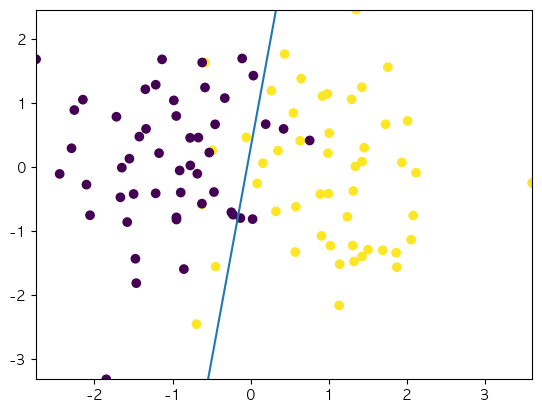

In [110]:
plt.scatter(df['X1'],df['X2'],c=df['y'])
plt.plot(x1,x2)
plt.xlim(df['X1'].min(), df['X1'].max()) # x축의 범위를 제한
plt.ylim(df['X2'].min(), df['X2'].max()) # y축의 범위를 제한
